## Importing the relevant libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import random
random.seed(10)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Load data

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [26]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

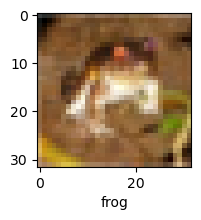

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

## preprocessing

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Build simple artificial neural network

In [7]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8116 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6240 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5426 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4841 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4335 - accuracy: 0.4957


## Build with CNN

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4929 - accuracy: 0.4657
Epoch 2/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1440 - accuracy: 0.6008
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0170 - accuracy: 0.6455
Epoch 4/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9324 - accuracy: 0.6769
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8694 - accuracy: 0.6992
Epoch 6/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8129 - accuracy: 0.7196
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7646 - accuracy: 0.7368
Epoch 8/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7270 - accuracy: 0.7469
Epoch 9/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6875 - accuracy: 0.7623
Epoch 10/20
1563/1563 [==============================] - 43s 27m

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1302 - accuracy: 0.6802


[1.1302107572555542, 0.6801999807357788]

In [13]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
print(y_test[:5])

313/313 [==============================] - 4s 13ms/step
[3, 8, 8, 0, 6]
[[3]
 [8]
 [8]
 [0]
 [6]]


frog


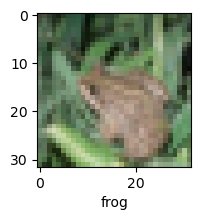

In [29]:
plot_sample(X_test, y_test,4)
print(classes[6])